In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)


<IPython.core.display.Javascript object>

In [2]:
# time.sleep(90)

In [3]:
# regions = [ 'us-west1-b', 'us-west1-b', 'us-west1-b']
# regions = [ 'us-west1-b']


instance_type = 'e2-small'

In [4]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 18, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 19, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 20, 'us-west1-b', 0, 4, 'FKE.pem', -1, 16,
# 21, 'us-west1-b', 0, 4, 'FKE.pem', -1, 17,
# 22, 'us-west1-b', 0, 4, 'FKE.pem', -1, 18,
# 23, 'us-west1-b', 0, 4, 'FKE.pem', -1, 19,
# 24, 'us-west1-b', 0, 5, 'FKE.pem', -1, 20,
# 25, 'us-west1-b', 0, 5, 'FKE.pem', -1, 21,
# 26, 'us-west1-b', 0, 5, 'FKE.pem', -1, 22,
# 27, 'us-west1-b', 0, 5, 'FKE.pem', -1, 23,
# 28, 'us-west1-b', 0, 6, 'FKE.pem', -1, 24,
# 29, 'us-west1-b', 0, 6, 'FKE.pem', -1, 25,
# 30, 'us-west1-b', 0, 6, 'FKE.pem', -1, 26,
# 31, 'us-west1-b', 0, 6, 'FKE.pem', -1, 27,
# 32, 'us-west1-b', 0, 7, 'FKE.pem', -1, 28,
# 33, 'us-west1-b', 0, 7, 'FKE.pem', -1, 29,
# 34, 'us-west1-b', 0, 7, 'FKE.pem', -1, 30,
# 35, 'us-west1-b', 0, 7, 'FKE.pem', -1, 31,
# 36, 'us-west1-b', 1, -1, 'FKE.pem', 4, -1,
# 37, 'us-west1-b', 1, -1, 'FKE.pem', 5, -1,
# 38, 'us-west1-b', 1, -1, 'FKE.pem', 6, -1,
# 39, 'us-west1-b', 1, -1, 'FKE.pem', 7, -1,
# 40, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 32,
# 41, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 33,
# 42, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 34,
# 43, 'us-west1-b', 0, 8, 'FKU2.pem', -1, 35,
# 44, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 36,
# 45, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 37,
# 46, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 38,
# 47, 'us-west1-b', 0, 9, 'FKU2.pem', -1, 39,
# 48, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 40,
# 49, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 41,
# 50, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 42,
# 51, 'us-west1-b', 0, 10, 'FKU2.pem', -1, 43,
# 52, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 44,
# 53, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 45,
# 54, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 46,
# 55, 'us-west1-b', 0, 11, 'FKU2.pem', -1, 47,
# 56, 'us-west1-b', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'us-west1-b', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'us-west1-b', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'us-west1-b', 1, -1, 'FKU2.pem', 11, -1,

In [5]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 18, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 19, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 20, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 16,
# 21, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 17,
# 22, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 18,
# 23, 'europe-west3-c', 0, 4, 'FKE.pem', -1, 19,
# 24, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 20,
# 25, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 21,
# 26, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 22,
# 27, 'europe-west3-c', 0, 5, 'FKE.pem', -1, 23,
# 28, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 24,
# 29, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 25,
# 30, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 26,
# 31, 'europe-west3-c', 0, 6, 'FKE.pem', -1, 27,
# 32, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 28,
# 33, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 29,
# 34, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 30,
# 35, 'europe-west3-c', 0, 7, 'FKE.pem', -1, 31,
# 36, 'europe-west3-c', 1, -1, 'FKE.pem', 4, -1,
# 37, 'europe-west3-c', 1, -1, 'FKE.pem', 5, -1,
# 38, 'europe-west3-c', 1, -1, 'FKE.pem', 6, -1,
# 39, 'europe-west3-c', 1, -1, 'FKE.pem', 7, -1,
# 40, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 32,
# 41, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 33,
# 42, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 34,
# 43, 'asia-south1-c', 0, 8, 'FKU2.pem', -1, 35,
# 44, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 36,
# 45, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 37,
# 46, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 38,
# 47, 'asia-south1-c', 0, 9, 'FKU2.pem', -1, 39,
# 48, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 40,
# 49, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 41,
# 50, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 42,
# 51, 'asia-south1-c', 0, 10, 'FKU2.pem', -1, 43,
# 52, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 44,
# 53, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 45,
# 54, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 46,
# 55, 'asia-south1-c', 0, 11, 'FKU2.pem', -1, 47,
# 56, 'asia-south1-c', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'asia-south1-c', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'asia-south1-c', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'asia-south1-c', 1, -1, 'FKU2.pem', 11, -1,

In [6]:
# 2 clusters

In [7]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 0,'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0,'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0,'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0,'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 25, 'asia-south1-c', 0, 1,'FKA.pem', -1, 24,
# 26, 'asia-south1-c', 0, 1,'FKA.pem', -1, 25,
# 27, 'asia-south1-c', 0, 1,'FKA.pem', -1, 26,
# 28, 'asia-south1-c', 0, 1,'FKA.pem', -1, 27,
# 29, 'asia-south1-c', 0, 1,'FKA.pem', -1, 28,
# 30, 'asia-south1-c', 0, 1,'FKA.pem', -1, 29,
# 31, 'asia-south1-c', 0, 1,'FKA.pem', -1, 30,
# 32, 'asia-south1-c', 0, 1,'FKA.pem', -1, 31,
# 33, 'asia-south1-c', 0, 1,'FKA.pem', -1, 32,
# 34, 'asia-south1-c', 0, 1,'FKA.pem', -1, 33,
# 35, 'asia-south1-c', 0, 1,'FKA.pem', -1, 34,
# 36, 'asia-south1-c', 0, 1,'FKA.pem', -1, 35,
# 37, 'asia-south1-c', 0, 1,'FKA.pem', -1, 36,
# 38, 'asia-south1-c', 0, 1,'FKA.pem', -1, 37,
# 39, 'asia-south1-c', 0, 1,'FKA.pem', -1, 38,
# 40, 'asia-south1-c', 0, 1,'FKA.pem', -1, 39,
# 41, 'asia-south1-c', 0, 1,'FKA.pem', -1, 40,
# 42, 'asia-south1-c', 0, 1,'FKA.pem', -1, 41,
# 43, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 42,
# 44, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 43,
# 45, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 44,
# 46, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 45,
# 47, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 46,
# 48, 'asia-south1-c', 0, 1, 'FKA.pem', -1, 47,
# 49, 'asia-south1-c', 1, -1, 'FKA.pem', 1, -1,


In [8]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 0, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 0, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 0, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 0, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 0, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 0, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 0, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 0, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 0, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 0, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 0, 0, 'FKA.pem', -1, 16,
# 17, 'us-west1-b', 0, 0, 'FKA.pem', -1, 17,
# 18, 'us-west1-b', 0, 0, 'FKA.pem', -1, 18,
# 19, 'us-west1-b', 0, 0, 'FKA.pem', -1, 19,
# 20, 'us-west1-b', 0, 0,'FKA.pem', -1, 20,
# 21, 'us-west1-b', 0, 0,'FKA.pem', -1, 21,
# 22, 'us-west1-b', 0, 0,'FKA.pem', -1, 22,
# 23, 'us-west1-b', 0, 0,'FKA.pem', -1, 23,
# 24, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 25, 'us-west1-b', 0, 1,'FKA.pem', -1, 24,
# 26, 'us-west1-b', 0, 1,'FKA.pem', -1, 25,
# 27, 'us-west1-b', 0, 1,'FKA.pem', -1, 26,
# 28, 'us-west1-b', 0, 1,'FKA.pem', -1, 27,
# 29, 'us-west1-b', 0, 1,'FKA.pem', -1, 28,
# 30, 'us-west1-b', 0, 1,'FKA.pem', -1, 29,
# 31, 'us-west1-b', 0, 1,'FKA.pem', -1, 30,
# 32, 'us-west1-b', 0, 1,'FKA.pem', -1, 31,
# 33, 'us-west1-b', 0, 1,'FKA.pem', -1, 32,
# 34, 'us-west1-b', 0, 1,'FKA.pem', -1, 33,
# 35, 'us-west1-b', 0, 1,'FKA.pem', -1, 34,
# 36, 'us-west1-b', 0, 1,'FKA.pem', -1, 35,
# 37, 'us-west1-b', 0, 1,'FKA.pem', -1, 36,
# 38, 'us-west1-b', 0, 1,'FKA.pem', -1, 37,
# 39, 'us-west1-b', 0, 1,'FKA.pem', -1, 38,
# 40, 'us-west1-b', 0, 1,'FKA.pem', -1, 39,
# 41, 'us-west1-b', 0, 1,'FKA.pem', -1, 40,
# 42, 'us-west1-b', 0, 1,'FKA.pem', -1, 41,
# 43, 'us-west1-b', 0, 1, 'FKA.pem', -1, 42,
# 44, 'us-west1-b', 0, 1, 'FKA.pem', -1, 43,
# 45, 'us-west1-b', 0, 1, 'FKA.pem', -1, 44,
# 46, 'us-west1-b', 0, 1, 'FKA.pem', -1, 45,
# 47, 'us-west1-b', 0, 1, 'FKA.pem', -1, 46,
# 48, 'us-west1-b', 0, 1, 'FKA.pem', -1, 47,
# 49, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,


In [9]:
# 3 clusters

In [10]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 0, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 0, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 0, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 0, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 0, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 0, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 0, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 0, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 0, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 0, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 16,
# 18, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 17,
# 19, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 18,
# 20, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 19,
# 21, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 20,
# 22, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 21,
# 23, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 22,
# 24, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 23,
# 25, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 24,
# 26, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 25,
# 27, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 26,
# 28, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 27,
# 29, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 28,
# 30, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 29,
# 31, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 30,
# 32, 'europe-west3-c', 0, 1, 'FKE.pem', -1, 31,
# 33, 'europe-west3-c', 1, -1, 'FKE.pem', 1, -1,
# 34, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 32,
# 35, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 33,
# 36, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 34,
# 37, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 35,
# 38, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 36,
# 39, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 37,
# 40, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 38,
# 41, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 39,
# 42, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 40,
# 43, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 41,
# 44, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 42,
# 45, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 43,
# 46, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 44,
# 47, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 45,
# 48, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 46,
# 49, 'asia-south1-c', 0, 2, 'FKU2.pem', -1, 47,
# 50, 'asia-south1-c', 1, -1, 'FKU2.pem', 2, -1,

In [11]:
# 3 cluster test non-geo

In [12]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 5, 'us-west1-b', 0, 1, 'FKE.pem', -1, 4,
# 6, 'us-west1-b', 0, 1, 'FKE.pem', -1, 5,
# 7, 'us-west1-b', 0, 1, 'FKE.pem', -1, 6,
# 8, 'us-west1-b', 0, 1, 'FKE.pem', -1, 7,
# 9, 'us-west1-b', 1, -1, 'FKE.pem', 1, -1,
# 10, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 8,
# 11, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 9,
# 12, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 10,
# 13, 'us-west1-b', 0, 2, 'FKU2.pem', -1, 11,
# 14, 'us-west1-b', 1, -1, 'FKU2.pem', 2, -1,

In [13]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKU2.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKU2.pem', 1, -1,
# 18, 'us-west1-b', 1, -1, 'FKU2.pem', 2, -1,
# 19, 'us-west1-b', 1, -1, 'FKU2.pem', 3, -1,

In [14]:
# 2 clusters

In [15]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,

# 4, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,

# 25, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 24,
# 26, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 25,
# 27, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 26,
# 28, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,


# 49, 'asia-south1-c', 1, -1, 'FKU2.pem', 1, -1,

In [16]:
# 6 clusters

In [17]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 0, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 0, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 1, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 1, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 1, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 1, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 1, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 1, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 1, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 1, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 17, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 18, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 16,
# 19, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 17,
# 20, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 18,
# 21, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 19,
# 22, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 20,
# 23, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 21,
# 24, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 22,
# 25, 'europe-west3-c', 0, 2, 'FKE.pem', -1, 23,
# 26, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 24,
# 27, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 25,
# 28, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 26,
# 29, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 27,
# 30, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 28,
# 31, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 29,
# 32, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 30,
# 33, 'europe-west3-c', 0, 3, 'FKE.pem', -1, 31,
# 34, 'europe-west3-c', 1, -1, 'FKE.pem', 2, -1,
# 35, 'europe-west3-c', 1, -1, 'FKE.pem', 3, -1,
# 36, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 32,
# 37, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 33,
# 38, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 34,
# 39, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 35,
# 40, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 36,
# 41, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 37,
# 42, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 38,
# 43, 'asia-south1-c', 0, 4, 'FKU2.pem', -1, 39,
# 44, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 40,
# 45, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 41,
# 46, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 42,
# 47, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 43,
# 48, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 44,
# 49, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 45,
# 50, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 46,
# 51, 'asia-south1-c', 0, 5, 'FKU2.pem', -1, 47,
# 52, 'asia-south1-c', 1, -1, 'FKU2.pem', 4, -1,
# 53, 'asia-south1-c', 1, -1, 'FKU2.pem', 5, -1,

In [18]:
# 8 clusters

In [19]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
# 1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
# 2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
# 3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
# 4, 'us-west1-b', 0, 0, 'FKA.pem', -1, 4,
# 5, 'us-west1-b', 0, 0, 'FKA.pem', -1, 5,
# 6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
# 7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
# 8, 'us-west1-b', 0, 1, 'FKA.pem', -1, 8,
# 9, 'us-west1-b', 0, 1, 'FKA.pem', -1, 9,
# 10, 'us-west1-b', 0, 1, 'FKA.pem', -1, 10,
# 11, 'us-west1-b', 0, 1, 'FKA.pem', -1, 11,
# 12, 'us-west1-b', 0, 2, 'FKA.pem', -1, 12,
# 13, 'us-west1-b', 0, 2, 'FKA.pem', -1, 13,
# 14, 'us-west1-b', 0, 2, 'FKA.pem', -1, 14,
# 15, 'us-west1-b', 0, 2, 'FKA.pem', -1, 15,
# 16, 'us-west1-b', 0, 2, 'FKA.pem', -1, 16,
# 17, 'us-west1-b', 0, 2, 'FKA.pem', -1, 17,
# 18, 'us-west1-b', 0, 3, 'FKA.pem', -1, 18,
# 19, 'us-west1-b', 0, 3, 'FKA.pem', -1, 19,
# 20, 'us-west1-b', 0, 3,'FKA.pem', -1, 20,
# 21, 'us-west1-b', 0, 3,'FKA.pem', -1, 21,
# 22, 'us-west1-b', 0, 3,'FKA.pem', -1, 22,
# 23, 'us-west1-b', 0, 3,'FKA.pem', -1, 23,
# 24, 'us-west1-b', 0, 4,'FKA.pem', -1, 24,
# 25, 'us-west1-b', 0, 4,'FKA.pem', -1, 25,
# 26, 'us-west1-b', 0, 4,'FKA.pem', -1, 26,
# 27, 'us-west1-b', 0, 4,'FKA.pem', -1, 27,
# 28, 'us-west1-b', 0, 4,'FKA.pem', -1, 28,
# 29, 'us-west1-b', 0, 4,'FKA.pem', -1, 29,
# 30, 'us-west1-b', 0, 5,'FKA.pem', -1, 30,
# 31, 'us-west1-b', 0, 5,'FKA.pem', -1, 31,
# 32, 'us-west1-b', 0, 5,'FKA.pem', -1, 32,
# 33, 'us-west1-b', 0, 5,'FKA.pem', -1, 33,
# 34, 'us-west1-b', 0, 5,'FKA.pem', -1, 34,
# 35, 'us-west1-b', 0, 5,'FKA.pem', -1, 35,
# 36, 'us-west1-b', 0, 6,'FKA.pem', -1, 36,
# 37, 'us-west1-b', 0, 6,'FKA.pem', -1, 37,
# 38, 'us-west1-b', 0, 6,'FKA.pem', -1, 38,
# 39, 'us-west1-b', 0, 6,'FKA.pem', -1, 39,
# 40, 'us-west1-b', 0, 6,'FKA.pem', -1, 40,
# 41, 'us-west1-b', 0, 6,'FKA.pem', -1, 41,
# 42, 'us-west1-b', 0, 7, 'FKA.pem', -1, 42,
# 43, 'us-west1-b', 0, 7, 'FKA.pem', -1, 43,
# 44, 'us-west1-b', 0, 7, 'FKA.pem', -1, 44,
# 45, 'us-west1-b', 0, 7, 'FKA.pem', -1, 45,
# 46, 'us-west1-b', 0, 7, 'FKA.pem', -1, 46,
# 47, 'us-west1-b', 0, 7, 'FKA.pem', -1, 47,
# 48, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
# 49, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
# 50, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
# 51, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
# 52, 'us-west1-b', 1, -1, 'FKA.pem', 4, -1,
# 53, 'us-west1-b', 1, -1, 'FKA.pem', 5, -1,
# 54, 'us-west1-b', 1, -1, 'FKA.pem', 6, -1,
# 55, 'us-west1-b', 1, -1, 'FKA.pem', 7, -1,

In [20]:
df =pd.read_csv('node_info.csv')

node_info_dict = df.to_dict()

node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [21]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

data1 = [x for x in data1 if x!='None']

In [22]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

data2 = [x for x in data2 if x!='None']

In [23]:
data2, len(data2)

(['10.138.0.6',
  '10.138.0.33',
  '10.138.0.11',
  '10.138.0.19',
  '10.138.0.5',
  '10.138.0.2',
  '10.138.0.3',
  '10.138.0.32',
  '10.138.0.31',
  '10.138.0.4',
  '10.138.0.16',
  '10.138.0.7',
  '10.138.0.21',
  '10.138.0.9',
  '10.138.0.15',
  '10.138.0.8',
  '10.138.0.28',
  '10.138.0.26',
  '10.138.0.25',
  '10.138.0.10',
  '10.156.0.35',
  '10.156.0.17',
  '10.156.0.36',
  '10.156.0.121',
  '10.156.0.41',
  '10.156.0.39',
  '10.156.0.32',
  '10.156.0.14',
  '10.156.0.45',
  '10.156.0.25',
  '10.156.0.16',
  '10.156.0.120',
  '10.156.0.15',
  '10.156.0.64',
  '10.156.0.24',
  '10.156.0.12',
  '10.156.0.43',
  '10.156.0.27',
  '10.156.0.31',
  '10.156.0.26',
  '10.160.0.16',
  '10.160.0.64',
  '10.160.0.2',
  '10.160.0.18',
  '10.160.0.31',
  '10.160.0.8',
  '10.160.0.14',
  '10.160.0.15',
  '10.160.0.11',
  '10.160.0.4',
  '10.160.0.59',
  '10.160.0.30',
  '10.160.0.24',
  '10.160.0.17',
  '10.160.0.70',
  '10.160.0.6',
  '10.160.0.32',
  '10.160.0.3',
  '10.160.0.25',
  '10.16

In [24]:
data = []

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])

In [25]:
data, len(data)

(['10.138.0.6    10.138.0.6',
  '10.138.0.33    10.138.0.33',
  '10.138.0.11    10.138.0.11',
  '10.138.0.19    10.138.0.19',
  '10.138.0.5    10.138.0.5',
  '10.138.0.2    10.138.0.2',
  '10.138.0.3    10.138.0.3',
  '10.138.0.32    10.138.0.32',
  '10.138.0.31    10.138.0.31',
  '10.138.0.4    10.138.0.4',
  '10.138.0.16    10.138.0.16',
  '10.138.0.7    10.138.0.7',
  '10.138.0.21    10.138.0.21',
  '10.138.0.9    10.138.0.9',
  '10.138.0.15    10.138.0.15',
  '10.138.0.8    10.138.0.8',
  '10.138.0.28    10.138.0.28',
  '10.138.0.26    10.138.0.26',
  '10.138.0.25    10.138.0.25',
  '10.138.0.10    10.138.0.10',
  '10.156.0.35    10.156.0.35',
  '10.156.0.17    10.156.0.17',
  '10.156.0.36    10.156.0.36',
  '10.156.0.121    10.156.0.121',
  '10.156.0.41    10.156.0.41',
  '10.156.0.39    10.156.0.39',
  '10.156.0.32    10.156.0.32',
  '10.156.0.14    10.156.0.14',
  '10.156.0.45    10.156.0.45',
  '10.156.0.25    10.156.0.25',
  '10.156.0.16    10.156.0.16',
  '10.156.0.120    10.

In [26]:
for index, item in enumerate(data1):
    if 'publicIP' not in node_info_dict.keys():
        node_info_dict['publicIP'] = {}

        
    node_info_dict['publicIP'][index] = item 
    
    
for index, item in enumerate(data2):
    if 'privateIP' not in node_info_dict.keys():
        node_info_dict['privateIP'] = {}
        
    node_info_dict['privateIP'][index] = item 
    
    
    
for index, item in enumerate(data):
    if 'publicAndprivateIP' not in node_info_dict.keys():
        node_info_dict['publicAndprivateIP'] = {}
        
    node_info_dict['publicAndprivateIP'][index] = item 

In [27]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [28]:
# time.sleep(60)

In [29]:
total_count = 0

for key in node_info_dict['ServerOrClientregion'].keys():
    if node_info_dict['ServerOrClientregion'][key] ==0:
        total_count = total_count + 1
        
total_count

48

In [30]:




def getTimeThps(file, flag):
    
    f = open(file, "r")
    data = f.readlines() 

    times = []
    thputs = []
    for line in data:
        if 'throughput[ops/s]' in line:
            lineData = (line[13+line.find('max[ops/s])>'):-2])
            print(lineData)

            times.append(lineData.split('|')[0])
            thputs.append(lineData.split('|')[-2])
    if (flag): 
        times.append(float(times[-1])+abs(float(times[-1]) - float(times[-2]) ))
        thputs.append(0)
        
    return np.array(times).astype(float), np.array(thputs).astype(float) 

In [31]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines, len(lines)

(['10.138.0.6',
  '10.138.0.33',
  '10.138.0.11',
  '10.138.0.19',
  '10.138.0.5',
  '10.138.0.2',
  '10.138.0.3',
  '10.138.0.32',
  '10.138.0.31',
  '10.138.0.4',
  '10.138.0.16',
  '10.138.0.7',
  '10.138.0.21',
  '10.138.0.9',
  '10.138.0.15',
  '10.138.0.8',
  '10.138.0.28',
  '10.138.0.26',
  '10.138.0.25',
  '10.138.0.10',
  '10.156.0.35',
  '10.156.0.17',
  '10.156.0.36',
  '10.156.0.121',
  '10.156.0.41',
  '10.156.0.39',
  '10.156.0.32',
  '10.156.0.14',
  '10.156.0.45',
  '10.156.0.25',
  '10.156.0.16',
  '10.156.0.120',
  '10.156.0.15',
  '10.156.0.64',
  '10.156.0.24',
  '10.156.0.12',
  '10.156.0.43',
  '10.156.0.27',
  '10.156.0.31',
  '10.156.0.26',
  '10.160.0.16',
  '10.160.0.64',
  '10.160.0.2',
  '10.160.0.18',
  '10.160.0.31',
  '10.160.0.8',
  '10.160.0.14',
  '10.160.0.15',
  '10.160.0.11',
  '10.160.0.4',
  '10.160.0.59',
  '10.160.0.30',
  '10.160.0.24',
  '10.160.0.17',
  '10.160.0.70',
  '10.160.0.6',
  '10.160.0.32',
  '10.160.0.3',
  '10.160.0.25',
  '10.16

In [32]:
for ip in lines:
    if ip!='None':
        current = (ip.split('.'))

        print('ssh -i "FinalKeys.pem" ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-6.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-33.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-11.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-19.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-5.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-2.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-3.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-32.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-31.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-4.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-16.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-7.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-138-0-21.us-west-1.compute.amazon

In [33]:
## Set number of clusters

nclusters = 0

for folder in os.listdir('.'):
    if 'config' in folder and folder!='config':
        nclusters = nclusters + 1
        
        
print(nclusters)





nreplicas = int(total_count/nclusters)
nclients = nclusters


nodeIps = []
clientIps = []

for i in range(total_count + nclients):
    if node_info_dict['ServerOrClientregion'][i] ==0:
        nodeIps.append(lines[i])
    else:
        clientIps.append(lines[i])


# nodeIps = lines[:nclusters* nreplicas]


# no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]



# clientIps = lines[-(nclusters):]



# clientIps = lines[-nclients:]



clientIps, no_cluster_yet_nodes

12


(['10.138.0.28',
  '10.138.0.26',
  '10.138.0.25',
  '10.138.0.10',
  '10.156.0.43',
  '10.156.0.27',
  '10.156.0.31',
  '10.156.0.26',
  '10.160.0.32',
  '10.160.0.3',
  '10.160.0.25',
  '10.160.0.21'],
 [])

In [34]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [35]:
node_info_dict['region'][0].strip()

"'us-west1-b'"

In [36]:
## Functions

def setup(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' commands.sh'+' resdb-'+f"{i:02}"+':/home/tejas/commands.sh'
        
        print(command)
        os.system(command)
        
def initialize(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo sh commands.sh"'
        
        
        os.system(command)
        
        
def git_clone(i):
    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command " sudo git clone https://github.com/tmane002/BftSmart_Final.git"'
        
        
        os.system(command)
        
def git_pull(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "git config --global --add safe.directory /home/tejas/BftSmart_Final; cd BftSmart_Final; sudo git pull"'
        
        
        os.system(command)
        
def compile_job(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo ./gradlew installDist"'
        
        
        os.system(command)

        
        
def clean_job(i):
    ip = node_info_dict['publicIP'][i] 
    
    rm_command = 'sudo rm config/currentView; '
    for iter_ in range(nclusters):
        rm_command = rm_command + 'sudo rm config'+str(iter_)+'/currentView; '
        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; cd BftSmart_Final; '+rm_command+'"'
        
        
        os.system(command)
        
        
def clean_all(i):
    ip = node_info_dict['publicIP'][i] 
    
    rm_command = 'sudo rm -r BftSmart_Final; sudo rm nohup.out;sudo rm nohup_client.out;'

        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; '+rm_command+'"'
        
        
        os.system(command)
        

        
        
        
#     if ip!='None' and( ip in no_cluster_yet_nodes):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.ap-south-1.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'
        
        
#         os.system(command)        
# #         print(command)

def check_node(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "tail -n 1000 nohup.out"'
        
        
        os.system(command)
#         print(command)


def run_basic_client(i):
    cmd_arg = ''
    
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        
        
        cmd_arg = str(node_info_dict['clientID'][i])
                
                
            
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup_client.out 2>&1 &"'

        
        os.system(command)


def kill_java(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo killall java; sudo killall nohup; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
        
        os.system(command)
        
        
        
def kill_clients(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and ip in clientIps:
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo killall java; sudo killall nohup"'
        
        
        os.system(command)

def run_server_node_check(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'
        
        
        print(command)
        
        

# for i in range(len(lines)):
#     run_server_node_check(i)

def run_basic_client_check(i):
    cmd_arg = ''
    
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        cmd_arg = str(node_info_dict['clientID'][i])
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup.out 2>&1 &"'

        
        print(command)

In [37]:
## First Time Setup

lines, len(lines)

(['10.138.0.6',
  '10.138.0.33',
  '10.138.0.11',
  '10.138.0.19',
  '10.138.0.5',
  '10.138.0.2',
  '10.138.0.3',
  '10.138.0.32',
  '10.138.0.31',
  '10.138.0.4',
  '10.138.0.16',
  '10.138.0.7',
  '10.138.0.21',
  '10.138.0.9',
  '10.138.0.15',
  '10.138.0.8',
  '10.138.0.28',
  '10.138.0.26',
  '10.138.0.25',
  '10.138.0.10',
  '10.156.0.35',
  '10.156.0.17',
  '10.156.0.36',
  '10.156.0.121',
  '10.156.0.41',
  '10.156.0.39',
  '10.156.0.32',
  '10.156.0.14',
  '10.156.0.45',
  '10.156.0.25',
  '10.156.0.16',
  '10.156.0.120',
  '10.156.0.15',
  '10.156.0.64',
  '10.156.0.24',
  '10.156.0.12',
  '10.156.0.43',
  '10.156.0.27',
  '10.156.0.31',
  '10.156.0.26',
  '10.160.0.16',
  '10.160.0.64',
  '10.160.0.2',
  '10.160.0.18',
  '10.160.0.31',
  '10.160.0.8',
  '10.160.0.14',
  '10.160.0.15',
  '10.160.0.11',
  '10.160.0.4',
  '10.160.0.59',
  '10.160.0.30',
  '10.160.0.24',
  '10.160.0.17',
  '10.160.0.70',
  '10.160.0.6',
  '10.160.0.32',
  '10.160.0.3',
  '10.160.0.25',
  '10.16

In [38]:
# for i in range(10):
#     setup(i)


results = Parallel(n_jobs=len(lines))(delayed(setup)(i) for i in range(len(lines)))
print(results)  

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [39]:
results = Parallel(n_jobs=len(lines))(delayed(initialize)(i) for i in range(len(lines)))
print(results)  

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease


fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease


fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Fetched 114 kB in 1s (183 kB/s)
Reading package lists...Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease


fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http:

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Fetched 114 kB in 1s (164 kB/s)
Reading package lists...Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 http://us-west1.gce.archive


Reading state information...

Reading package lists...
Building dependency tree...Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease


fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-extra libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libfontenc1
  libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libice6 libllvm12 libpciaccess0 libsensors-config libsensors5 libsm6
  libvulkan1 libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0
  libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0
  libxcb-shm0 libxcb-syn

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.






Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...Reading package lists...

Building dependency tree...Building dependency tree...Reading package lists...

Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Building dependency tree...
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 l


Building dependency tree...The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
  libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4
  libxrandr2 libxrender1 libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1
  libxxf86vm1 mesa-vulkan-drivers openjdk-11-jre x11-common x11-utils


Reading package lists...
Reading state information...

0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.
Building dependency 



Reading state information...Building dependency tree...

Reading package lists...

Reading package lists...Building dependency tree...
Reading state information...


Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-extra libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libfontenc1
  libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libice6 libllvm12 libpciaccess0 libs


The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
  libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4
  libxrandr2 libxrender1 libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1
  libxxf86vm1 mesa-vulkan-drivers openjdk-11-jre x11-common x11-utils
Reading package lists...0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.


Reading state information...

Building dependency tree...The following package


Reading state information...

Reading state information...
Reading package lists...Reading package lists...Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Reading package lists...The following NEW packages will be installed:

Reading package lists...  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
  libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4
  libxrandr2 libxre


Reading state information...
Building dependency tree...
The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvn

0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.
curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2

  libmb

job.sh: 12: sdk: not found


0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Reading package lists...Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading state information...

Building dependency tree...0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.

Reading state information...

Reading state information...
Reading package lists...Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Reading package lists...

Reading state information...
Reading package lists...Building dependency tree...
Building dependency tree...
Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Building dependency tree

job.sh: 12: sdk: not found


  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...

Reading state information...
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
Building dependency tree...  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading state information...
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and





job.sh: 12: sdk: not found



0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.

Reading state information...
curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...
Reading state information...


                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
               

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


job.sh: 12: sdk: not found
job.sh: 12: sdk: not found



Reading state information...

Building dependency tree...
Reading state information...
Reading package lists...
Reading state information...Building dependency tree...
Reading package lists...
Reading state information...
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2

  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Building dependency tree...Building dependency tree...curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblock

job.sh: 12: sdk: not found


job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0

Reading state information...  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Building dependency tree...
Reading state information...
Reading package lists...curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 lib

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found


The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
  libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4
  libxrandr2 libxrender1 libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1
  libxxf86vm1 mesa-vulkan-drivers openjdk-11-jre x11-common x11-utils

Reading state information...

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.

Building dependency tree...Reading package lists...                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`           .sh:         yMMN`      /m.
         -dh-           :ymNMMMMy  `-/shmNm-`:N/-.``   `.sN            /N-         `NMMy      .m/
       `oNs`          -hysosmMMMMydmNmds+-.:ohm           :             sd`        :MMM/      yy
      .hN+           /d:    -MMMmhs/-.`   .MMMh   .ss+-                

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading state information...

Building dependency tree...Reading package lists...curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 lib

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 us

job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
Reading package lists...  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...
Building dependency tree...iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data


job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 t

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockde

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`           .sh:         yMMN`      /m.
         -dh-           :ymNMMMMy  `-/shmNm-`:N/-.``   `.sN            /N-         `NMMy      .m/
       `oNs`          -hysosmMMMMydmNmds+-.:ohm           :             sd`        :MMM/      yy
      .hN+           /d:    -MMMmhs/-.`   .MMM


Reading state information...

Reading state information...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2

  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh- 

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading state information...

Reading state information...

Reading state information...
curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblo

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found


Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Us

job.sh: 12: sdk: not found




Building dependency tree...Building dependency tree...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...

Reading state information...

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading state information...

Reading state information...

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Reading package lists...
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...
Building dependency tree...iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-dat

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease


fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease


fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:3 http://sec

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...Hit:4 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://europe-west3.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Reading package lists...Reading package lists...Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
Reading package lists...Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease

Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
Reading package lists...Reading package lists...
Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
Building dependency tree...Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease




fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Reading package lists...Reading package lists...Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...Reading package lists...Hit:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease


fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
Reading package lists...Reading package lists...Reading package lists...
Reading state information...
Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease





fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease

Building dependency tree...Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
Reading package lists...Reading package lists...Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Reading package lists...Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backport

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


Hit:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease

Reading state information...
Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease


Suggested packages:
  lm-sensors mesa-utils
The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
  libxfixes3





fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.


fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.
fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.



Building dependency tree...Reading package lists...Reading package lists...Reading package lists...
Building dependency tree...Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease

Building dependency tree...Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:1 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal InRelease
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  

fatal: destination path 'BftSmart_Final' already exists and is not an empty directory.






Building dependency tree...Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease

Reading package lists...Reading package lists...Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease

Building dependency tree...Hit:2 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:3 http://asia-south1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease


Building dependency tree...The following packages were automatically installed and are no longer required:
  lib

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-extra libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libfontenc1
  libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libice6 libllvm12 libpciaccess0 libsensors-config libsensors5 libsm6
  libvulkan1 libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0
  libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0
  libxcb-shm0 libxcb-syn



Use with caution in scripts.











Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.

Reading state information...


Reading state information...
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Building dependency tree...
Reading package lists...Building dependency tree...
Reading package lists...Building dependency tree...Reading package lists...
Building dependency tree...
Reading package lists...Building dependency tree...Reading package lists...
Reading state information...
Reading package lists...Reading package lists...Reading package lists...build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 lib



Reading state information...

Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
Building dependency tree...
The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.
Reading package lists...Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be u

Use with caution in scripts.







The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-extra libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libfontenc1
  libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libice6 libllvm12 libpciaccess0 libsensors-config libsensors5 libsm6
  libvulkan1 libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0
  libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0
  libxcb-shm0 libxcb-syn

build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.
Reading package lists...

Reading state information...
Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.

Reading package lists...Need to get 39.7 MB of archives.
After this operation, 537 MB of additional disk space will be used.
Do you want to continue? [Y/n] Abort.
The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra 



job.sh: 12: sdk: not found






Building dependency tree...Reading package lists...  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
  libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4
  libxrandr2 libxrender1 libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1
  libxxf86vm1 mesa-vulkan-drivers openjdk-11-jre x11-common x11-utils
0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.


Reading state information...
Building dependency tree...The following packages were automaticall



job.sh: 12: sdk: not found




The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
  libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4
Reading package lists...Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libn


Building dependency tree...Building dependency tree...
Reading state information...

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 lib







job.sh: 12: sdk: not found










Building dependency tree...
Reading state information...Reading package lists...
Reading package lists...
Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2

  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

The following additional packages will be installed:
  at-spi2-core fonts-dejavu-extra libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libfontenc1
  libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libice6 libllvm12 libpciaccess0 libsensors-config libsensors5 libsm6
  libvulkan1 libwayland

job.sh: 12: sdk: not found


Reading package lists...

Reading state information...
curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
  usb-modeswitch-data
Use 'sudo apt autoremov







job.sh: 12: sdk: not found






Reading state information...



Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Building dependency tree...Building dependency tree...Building dependency tree...Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Building dependency tree...Reading package lists...
                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .

 +MMM.                                           sNo`.sNMM+     :MMMM/        sh`+MMMNmNm+++-
 mMMM-                                           /--ohmMMM+     :MMMMm.       `hyymmmdddo
 MMMMh.                  ````                  `-+yy/`yMMM/     :MMMMMy       -sm:.``..-:-.`
 dMMMMmo-.``````..-:/osyhddddho.           `+shdh+.   hMMM:     :MmMMMM/   ./yy/` `:sys+/+sh/
 .dMMMMMMmdddddmmNMMMNNNNNMMMMMs           sNdo-      dMMM-  `-/yd/MMMMm-:sy+.   :hs-      /N`
  `/ymNNNNNNNmmdys+/::----/dMMm:          +m-         mMMM+ohmo/.` sMMMMdo-    .om:       `sh
     `.-----+/.`       `.-+hh/`         `od.          NMMNmds/     `mmy:`     +mMy      `:yy.
           /moyso+//+ossso:.           .yy`          `dy+:`         ..       :MMMN+---/oys:
         /+m:  `.-:::-`               /d+                                    +MMMMMMMNh:`
        +MN/                        -yh.                                     `+hddhy+.
       /MM+                       .sh:
      :NMo                      -sh/
 



job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


Building dependency tree...Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


Reading state information...
Building dependency tree...0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.
The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data
  libatspi2.0-0 libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libfontenc1 libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libice6 libllvm12 libpciaccess0 libsensors-config
  libsensors5 libsm6 libvulkan1 libwayland-client0 libx11-xcb1 libxaw7
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0
  libxcb-shape0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1
  libxfixes3 libxft2 libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4
  libxrandr2 libxrender1 libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1

R

job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
Building dependency tree...  at-spi2-core fonts-dejavu-extra libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdrm-amdgpu1 libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libfontenc1
  libgif7 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libice6 libllvm12 libpciaccess0 libsensors-config libsensors5 libsm6
  libvulkan1 libwayland-client0 libx11-xcb1 libxaw7 libxcb-dri2-0
  libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-randr0 libxcb-shape0
  libxcb-shm0 libxcb-sync1 libxcb-xfixes0 libxcomposite1 libxfixes3 libxft2
  libxi6 libxinerama1 libxkbfile1 libxmu6 libxpm4 libxrandr2 libxrender1
  libxshmfence1 libxt6 libxtst6 libxv1 libxxf86dga1 libxxf86vm1
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
  mesa-vulkan

Building dependency tree...Reading package lists...
Reading state information...
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

0 upgraded, 60 newly installed, 0 to remove and 56 not upgraded.
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Suggested packages:
  lm-sensors mesa-utils
The following NEW packages will be installed:
  at-spi2-core default-jre fonts-dejavu-extra libatk-bridge2.0-0
  libatk-wr

job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be inst

  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
      

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found



Reading state information...
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
Reading package lists...  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Building dependency tree...build-essential is already the newest version (12.8ubuntu1.1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'su

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


Reading package lists...Reading package lists...
Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Reading package lists...

Building dependency tree...
Reading state information...Building dependency tree...

Building dependency tree...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found


Reading package lists...
Reading state information...

Reading state information...

Reading state information...
Reading package lists...

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`


Reading state information...

Reading state information...

Reading state information...

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`           .sh:         yMMN`      /m.
         -

job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.


Reading state information...Reading package lists...
Building dependency tree...
Reading package lists...Building dependency tree...
Reading state information...


curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
Reading package lists...  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
ant is already the 

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found


iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Building dependency tree...Building dependency tree...
Reading state information...iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2

  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Building dependency tree...
Building dependency tree...
Reading state information...
Reading package lists...
Reading state information...

Reading package lists...Building dependency tree...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Building dependency tree...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/y

Building dependency tree...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-pa

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found


curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading package lists...Reading package lists...Reading package lists...
Reading state information...

0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


Building dependency tree...curl is already the newest version (7.68.0-1ubuntu2.20).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 lib

job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Reading state information...
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgrad

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found
job.sh: 12: sdk: not found


iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...ant is already the newest v

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Building dependency tree...
Reading state information...
Reading package lists...
Reading state information...

Building dependency tree...
Reading state information...
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libbloc

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
job.sh: 12: sdk: not found



                                -+syyyyyyys:
                            `/yho:`       -yd.
                         `/yh/`             +m.
                       .oho.                 hy                          .`
                     .sh/`                   :N`                `-/o`  `+dyyo:.
                   .yh:`                     `M-          `-/osysoym  :hs` `-+sys:      hhyssssssssy+
                 .sh:`                       `N:          ms/-``  yy.yh-      -hy.    `.N-````````+N.
               `od/`                         `N-       -/oM-      ddd+`     `sd:     hNNm        -N:
              :do`                           .M.       dMMM-     `ms.      /d+`     `NMMs       `do
            .yy-                             :N`    ```mMMM.      -      -hy.       /MMM:       yh
          `+d+`           `:/oo/`       `-/osyh/ossssssdNMM`           .sh:         yMMN`      /m.
         -dh-           :ymNMMMMy  `-/shmNm-`:N/-.``   `.sN            /N-         `NMMy      .m/
  


                                                                 Now attempting installation...


Looking for a previous installation of SDKMAN...
Looking for unzip...
Not found.
 Please install unzip on your system using your favourite package manager.

 Restart after installing unzip.

'exit 1': command failed with exit code 1.
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Reading package lists...0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Building dependency tree...Readin

job.sh: 12: sdk: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading state information...
Reading package lists...iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
Building dependency tree...
Building dependency tree...
Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libb

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



Reading state information...
ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.

Reading state information...
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Reading package lists...ant is already the newest version (1.10.7-1).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libx

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.

Reading state information...

Reading state information...
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found



0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found
'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
iputils-ping is already the newest version (3:20190709-3).
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnuma1 libparted-fs-resize0
  libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2 usb-modeswitch
  usb-modeswitch-data
Use 'sudo apt au

'unknown': I need something more specific.
job.sh: 16: ./gradlew: not found


In [40]:
# ## GIT Clone/Pull



# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))


# print(results)  

In [41]:
# ## Compile Job

results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
print(results)  

Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent bui

Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 10s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 11s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO

In [42]:
# ## CLEAN SERVERS

# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# print(results)  

In [43]:
results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))


nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-client: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-app: no process found


In [44]:
def run_server_node(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(node_info_dict['ServerID'][i])+' >../nohup.out 2>&1 &"'
        
        
        os.system(command)

In [45]:


# for i in node_info_dict['publicIP']:
#     run_server_node(i)

In [46]:
## RUN SERVERS

# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# print(results)  

In [47]:
### CHECK NODE RESULT

# check_node(0)

In [48]:
# ## Run basic client

# # time.sleep(20)
# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# print(results)  

# check_node(0)

# time.sleep(60)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))

In [49]:
## Main Job

# os.system('git add .; git commit -m "test";git push')

experiment = 'TestRun_'+str(total_count)+'_clusters_'+str(nclusters)

In [50]:
# time.sleep(60)

In [51]:
import os
os.system('git add .; git commit -m "Working with modified ClusterInfo";git push')


[main 8ae44073] Working with modified ClusterInfo
 1 file changed, 3146 insertions(+), 16132 deletions(-)
 rewrite BFTSmart-MCJob-Server-Geo-GC.ipynb (86%)


ERROR: Permission to tmane002/BftSmart_Final.git denied to deploy key
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


32768

In [52]:
%%time


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# print(results) 





results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# print(results)  


print('XXXXXXXX Started Servers XXXXXXXXXXXX')

time.sleep(40)

check_node(7)



print('XXXXXXXX Started Clients XXXXXXXXXXXX')

results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))

time.sleep(180)

results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
java: no process found
nohup: no process found
java: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-client: no process found
java: no process found
hotstuff-app: no process found
nohup: no process found
java: no process found
hotstuff-client: no process found
java: no process found
hotstuff-app: no process found
java: no process found
nohup: no process found
nohup: no process found
nohup: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no proces

Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-

From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main
From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Updating 9932e969..062ca8f2
Fast-forward
Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)


From https://github.com/tmane002/BftSmart_Final
   9932e969..062ca8f2  main       -> origin/main


Updating 9932e969..062ca8f2
Fast-forward
 BFTSmart-MCJob-Server-Geo-GC.ipynb | 37922 ++++++-----------------------------
 1 file changed, 6179 insertions(+), 31743 deletions(-)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds

Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
Starting a Gradle Daemon (subsequent builds will be faster)
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-DATE

BUILD SUCCESSFUL in 10s
3 actionable tasks: 3 up-to-date
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :compileJava UP-TO-DATE
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :installDist UP-TO-D

rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directory
rm: cannot remove 'config8/currentView': No such file or directory
rm: cannot remove 'config9/currentView': No such file or directory
rm: cannot remove 'config10/currentView': No such file or directory
rm: cannot remove 'config11/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or direc

rm: cannot remove 'config10/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config11/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config11/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directoryrm: cannot remove 'config/currentView': No such file or directory

rm: cannot remove 'config8/currentView': No such file or directoryrm: c


rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config8/currentView': No such file or directory
rm: cannot remove 'config9/currentView': No such file or directory
rm: cannot remove 'config10/currentView': No such file or directory
rm: cannot remove 'config11/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
: No such file or directory
rm: cannot remove 'config2/curren

rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
rm: cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directory
rm: cannot remove 'config8/currentView': No such file or directory
rm: cannot remove 'config10/currentView': No such file or directory
rm: cannot remove 'config11/currentView': No such file or directory
rm: cannot remove 'nohup.out': No such file or directory
rm: cannot remove 'config/currentView': No such file or directory
rm: rm: cannot remove 'nohup.out': No such file or directory
rm: cannot 

rm: cannot remove 'config/currentView': No such file or directory
rm: cannot remove 'config0/currentView': No such file or directory
cannot remove 'config1/currentView': No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/currentView': No such file or directory
rm: cannot remove 'config5/currentView': No such file or directory
rm: cannot remove 'config6/currentView': No such file or directory
rm: cannot remove 'config7/currentView': No such file or directory
rm: cannot remove 'config8/currentView': No such file or directory
rm: cannot remove 'config9/currentView': No such file or directory
rm: cannot remove 'config10/currentView': No such file or directory
rm: : No such file or directory
rm: cannot remove 'config2/currentView': No such file or directory
rm: cannot remove 'config3/currentView': No such file or directory
rm: cannot remove 'config4/current

XXXXXXXX Started Servers XXXXXXXXXXXX
config+cinfo.getClusterNumber(id) is: config1
-- Creating current view from configuration file
-- myPort, InetAddress.getByName(myAddress) and myAddress are: 20000, /10.138.0.32, 10.138.0.32
-- getConnection HERE 
-- SSL/TLS handshake complete!, Id:0  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- Reached here inside Server Connection
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:1  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:2  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:3  ## CipherSuite: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256.
-- getConnection HERE 
-- Reached here inside Server Connection
-- SSL/TLS handshake complete!, Id:4  ## CipherSuite: TLS_ECDHE_ECDSA_W

nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found
nohup: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
nohup: no process found
hotstuff-app: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
hotstuff-app: no process found
hotstuff-client: no process found
hotstuff-client: no process found
nohup: no process found
nohup: no process found
hotstuff-app: no process found
nohup: no process found
hotstuf

CPU times: user 475 ms, sys: 131 ms, total: 606 ms
Wall time: 5min 36s


nohup: no process found
hotstuff-app: no process found
hotstuff-client: no process found


In [53]:
check_node(0)

-- received ocmd: bftsmart.consensus.messages.OtherClusterMessage@306f1831
-- 


 PROCESSING OtherClusterMessage by Message Handler with type2
-- Tejas: reached inside deliveryOtherCluster type 2, from_cid_start, from, fromConfig, msg.getSender(), are 6184, 24, config6, 24,  getCurrentViewN: 4
-- DoneMainLoopExec.contains(msg.getOcmd().from_cid_start) for cid: 6184, is : false
-- othermsgs_received_mc for tid: 6184, is temp size, nclusters is 7, 12, temp keyset [4, 5, 6, 7, 8, 9, 11]
-- Not executing for tid: 6184
-- <-- receiving, msg:bftsmart.consensus.messages.OtherClusterMessage@731c6158 with it being OtherClusterMessage=true
-- received ocmd: bftsmart.consensus.messages.OtherClusterMessage@731c6158
-- 


 PROCESSING OtherClusterMessage by Message Handler with type2
-- Tejas: reached inside deliveryOtherCluster type 2, from_cid_start, from, fromConfig, msg.getSender(), are 6186, 32, config8, 32,  getCurrentViewN: 4
-- DoneMainLoopExec.contains(msg.getOcmd().from_cid_start) for cid:

In [60]:
if not os.path.exists('../Experiments/'+experiment):
    os.mkdir('../Experiments/'+experiment)

os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')



for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(node_info_dict['ServerID'][i])+'.out'

        os.system(command)

        break;

        

for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        print('client copying id= ',i)
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

rm: cannot remove 'TestRun_48_clusters_12.png': No such file or directory


client copying id=  16
gcloud compute scp --zone "us-west1-b" resdb-16:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_0.out
client copying id=  17
gcloud compute scp --zone "us-west1-b" resdb-17:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_1.out
client copying id=  18
gcloud compute scp --zone "us-west1-b" resdb-18:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_2.out
client copying id=  19
gcloud compute scp --zone "us-west1-b" resdb-19:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_3.out
client copying id=  36
gcloud compute scp --zone "europe-west3-c" resdb-36:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_4.out
client copying id=  37
gcloud compute scp --zone "europe-west3-c" resdb-37:/home/tejas/nohup_client.out ../Experiments/TestRun_48_clusters_12/nohup_client_5.out
client copying id=  38
gcloud compute scp --zone "

In [61]:

for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    
    print(i)
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        print('client copying id= ',i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
client copying id=  16
17
client copying id=  17
18
client copying id=  18
19
client copying id=  19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
client copying id=  36
37
client copying id=  37
38
client copying id=  38
39
client copying id=  39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
client copying id=  56
57
client copying id=  57
58
client copying id=  58
59
client copying id=  59


In [62]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [63]:
clientIps

['10.138.0.28',
 '10.138.0.26',
 '10.138.0.25',
 '10.138.0.10',
 '10.156.0.43',
 '10.156.0.27',
 '10.156.0.31',
 '10.156.0.26',
 '10.160.0.32',
 '10.160.0.3',
 '10.160.0.25',
 '10.160.0.21']

In [64]:


def getTimesThputs(file):
    f = open(file, "r")
    data = f.readlines() 
    times = []
    thputs = []
    latencies = []
    for line in data:
#         print(line)
        if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

#         print(line)
            times.append(line.split('sec:')[0].strip())
            thputs.append(line.split(';')[1].split('current')[0].strip())
            latencies.append(line.split('=')[1].split(']')[0].strip())
            
            print(line,latencies[-1],thputs[-1],times[-1])

    return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  



In [65]:
times_thputsDict = {}
times_latsDict = {}

for ip in clientIps[:1]:    
    i = clientIps.index(ip)
    
    times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    print(times, thputs)
    for i in range(len(times)):
        times_thputsDict[times[i]] = thputs[i]
        times_latsDict[times[i]] = lats[i]
        

for ip in clientIps[1:]:    
    i = clientIps.index(ip)
    
    times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
    for i in range(len(times)):
        
        if times[i] in times_thputsDict.keys():
            times_thputsDict[times[i]] += thputs[i]
            
        if times[i] in times_latsDict.keys():
            times_latsDict[times[i]] += lats[i]
    

 17 sec: 101 operations; 101 current ops/sec; [UPDATE AverageLatency(us)=12534504.69] 
 12534504.69 101 17
 18 sec: 314 operations; 212.36 current ops/sec; [UPDATE AverageLatency(us)=543562.88] 
 543562.88 212.36 18
 19 sec: 514 operations; 200 current ops/sec; [UPDATE AverageLatency(us)=435752.33] 
 435752.33 200 19
 20 sec: 615 operations; 100.9 current ops/sec; [UPDATE AverageLatency(us)=802009.74] 
 802009.74 100.9 20
 21 sec: 709 operations; 93.91 current ops/sec; [UPDATE AverageLatency(us)=1077612.61] 
 1077612.61 93.91 21
 22 sec: 719 operations; 10 current ops/sec; [UPDATE AverageLatency(us)=1693415.9] 
 1693415.9 10 22
 23 sec: 815 operations; 95.9 current ops/sec; [UPDATE AverageLatency(us)=1817621.7] 
 1817621.7 95.9 23
 24 sec: 901 operations; 86 current ops/sec; [UPDATE AverageLatency(us)=1247260.79] 
 1247260.79 86 24
 25 sec: 961 operations; 59.94 current ops/sec; [UPDATE AverageLatency(us)=1529126.05] 
 1529126.05 59.94 25
 26 sec: 1012 operations; 50.95 current ops/sec

 13 sec: 125 operations; 124.88 current ops/sec; [UPDATE AverageLatency(us)=7143735.82] 
 7143735.82 124.88 13
 14 sec: 355 operations; 229.08 current ops/sec; [UPDATE AverageLatency(us)=515658.9] 
 515658.9 229.08 14
 15 sec: 866 operations; 511 current ops/sec; [UPDATE AverageLatency(us)=197796.51] 
 197796.51 511 15
 16 sec: 1523 operations; 655.03 current ops/sec; [UPDATE AverageLatency(us)=177620.86] 
 177620.86 655.03 16
 17 sec: 2245 operations; 721.28 current ops/sec; [UPDATE AverageLatency(us)=131114.96] 
 131114.96 721.28 17
 18 sec: 3084 operations; 838.16 current ops/sec; [UPDATE AverageLatency(us)=120806.24] 
 120806.24 838.16 18
 19 sec: 4401 operations; 1317 current ops/sec; [UPDATE AverageLatency(us)=77516.72] 
 77516.72 1317 19
 20 sec: 5703 operations; 1299.4 current ops/sec; [UPDATE AverageLatency(us)=78817.06] 
 78817.06 1299.4 20
 21 sec: 7030 operations; 1327 current ops/sec; [UPDATE AverageLatency(us)=74374.68] 
 74374.68 1327 21
 22 sec: 8309 operations; 1277.72

In [66]:
times_thputsDict

{17.0: 1792.8400000000001,
 18.0: 2133.83,
 19.0: 2385.56,
 20.0: 2074.8900000000003,
 21.0: 2035.2800000000002,
 22.0: 1919.53,
 23.0: 2205.96,
 24.0: 2214.71,
 25.0: 2238.27,
 26.0: 2096.68,
 27.0: 2027.22,
 28.0: 2074.0,
 29.0: 2237.79,
 30.0: 1958.16,
 31.0: 2164.66,
 32.0: 2074.23,
 33.0: 2146.66,
 34.0: 2146.7799999999997,
 35.0: 2263.91,
 36.0: 2584.37,
 37.0: 2597.82,
 38.0: 2531.61,
 39.0: 2535.91,
 40.0: 2576.58,
 41.0: 2411.81,
 42.0: 2605.52,
 43.0: 2387.82,
 44.0: 2610.52,
 45.0: 2355.9,
 46.0: 2401.72,
 47.0: 2702.83,
 48.0: 2746.36,
 49.0: 2429.9,
 50.0: 2622.6,
 51.0: 2734.42,
 52.0: 2329.77,
 53.0: 2800.3700000000003,
 54.0: 2689.8199999999997,
 55.0: 2564.55,
 56.0: 2876.85,
 57.0: 2582.49,
 58.0: 2794.77,
 59.0: 2263.85,
 60.0: 2407.78,
 61.0: 2781.84,
 62.0: 2578.59,
 63.0: 2681.84,
 64.0: 2687.4199999999996,
 65.0: 2872.81,
 66.0: 2646.47,
 67.0: 2777.37,
 68.0: 2803.8,
 69.0: 2459.69,
 70.0: 2750.41,
 71.0: 2518.81,
 72.0: 2902.76,
 73.0: 2402.82,
 74.0: 2255.86,


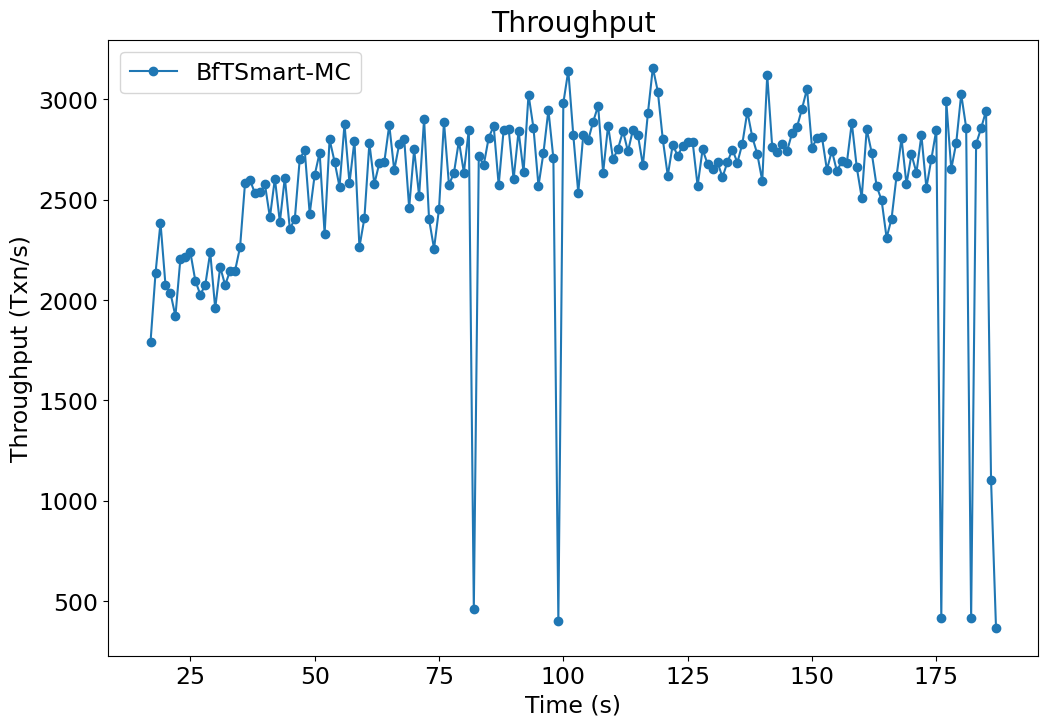

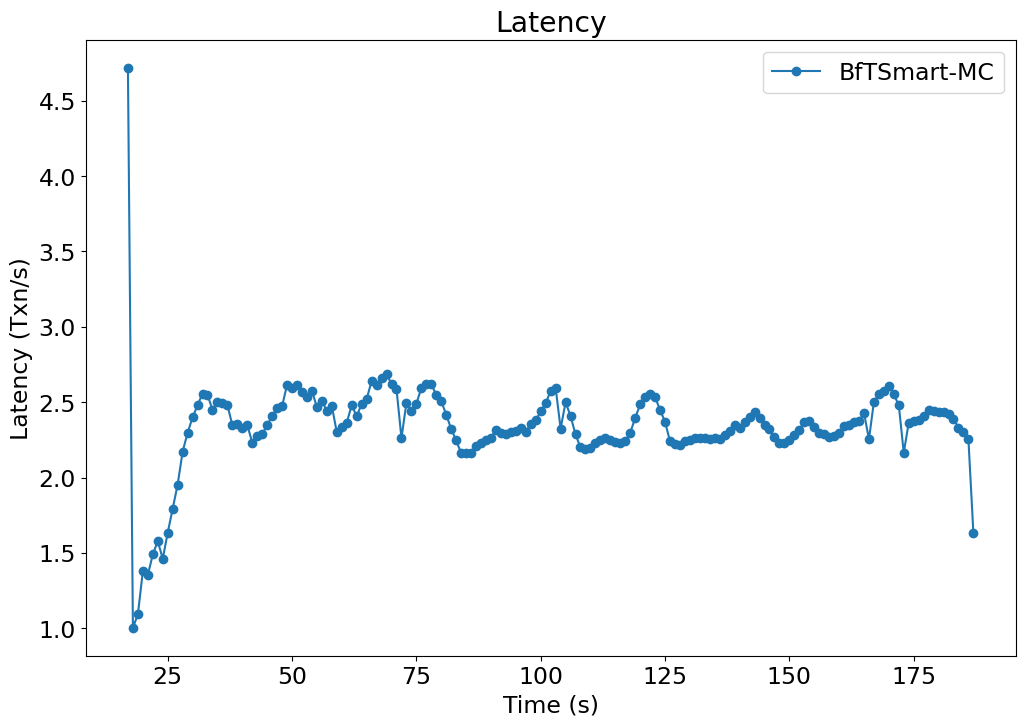

In [67]:
PIK = '../Experiments/'+experiment+"/pickle.dat"

data = [times_thputsDict, times_latsDict]

with open(PIK, "wb") as f:
    pickle.dump(data, f)


data2 = []
with open(PIK, "rb") as f:
    data2 =  pickle.load(f)


dict1 = data2[0]
dict2 = data2[1]



times1 = np.array(list(dict1.keys()))
thputs = np.array(list(dict1.values()))

times2 = np.array(list(dict2.keys()))
lats = np.array(list(dict2.values()))

times1

import pylab as pl

pl.figure(figsize = (12,8))
pl.rcParams.update({'font.size': 17})
pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


pl.title(r'Throughput')


pl.xlabel('Time (s)')
pl.ylabel('Throughput (Txn/s)')
pl.legend()
pl.savefig('../Experiments/'+experiment+'/out1.png', dpi = 150)
pl.show()




pl.figure(figsize = (12,8))
pl.rcParams.update({'font.size': 17})
pl.plot(times1[:], lats[:]/ len(clientIps), '-o', label='BfTSmart-MC')


pl.title(r'Latency')


pl.xlabel('Time (s)')
pl.ylabel('Latency (Txn/s)')
pl.legend()
pl.savefig('../Experiments/'+experiment+'/out2.png', dpi = 150)
pl.show()

In [68]:
times1, lats

(array([ 17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,
         28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
         39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
         50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
         61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
         83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
         94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
        105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
        116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
        127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 137.,
        138., 139., 140., 141., 142., 143., 144., 145., 146., 147., 148.,
        149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159.,
        160., 161., 162., 163., 164., 

In [69]:
lats, np.average(lats[-85:-5])/len(clientIps)

(array([56.63368107, 12.04029351, 13.10065092, 16.53135612, 16.21870082,
        17.87701596, 18.93492338, 17.52705747, 19.60586454, 21.52151599,
        23.44270017, 26.06302382, 27.56333741, 28.78793185, 29.76321609,
        30.67835102, 30.57636289, 29.41258578, 30.00876856, 29.94062265,
        29.76839193, 28.16933773, 28.2371081 , 27.9607362 , 28.18731554,
        26.77155671, 27.30199603, 27.45495138, 28.16472113, 28.89162578,
        29.53227269, 29.6836074 , 31.39290122, 31.14098   , 31.33015009,
        30.8294379 , 30.45231447, 30.91058531, 29.59590392, 30.12879413,
        29.28998424, 29.70689518, 27.5923252 , 28.04437098, 28.37982546,
        29.75485384, 28.87443275, 29.86273825, 30.24154117, 31.69233643,
        31.37012048, 31.93326311, 32.22392023, 31.45829532, 31.0507589 ,
        27.14867781, 29.93870873, 29.29742323, 29.87714823, 31.13142462,
        31.43371345, 31.47745482, 30.54021558, 30.08628056, 28.99949749,
        27.87712366, 26.95581475, 25.94439523, 25.9

In [70]:
np.sum(thputs),  np.average(thputs[-85:-5])

(440088.98000000004, 2696.10775)

In [71]:
thputs

array([1792.84, 2133.83, 2385.56, 2074.89, 2035.28, 1919.53, 2205.96,
       2214.71, 2238.27, 2096.68, 2027.22, 2074.  , 2237.79, 1958.16,
       2164.66, 2074.23, 2146.66, 2146.78, 2263.91, 2584.37, 2597.82,
       2531.61, 2535.91, 2576.58, 2411.81, 2605.52, 2387.82, 2610.52,
       2355.9 , 2401.72, 2702.83, 2746.36, 2429.9 , 2622.6 , 2734.42,
       2329.77, 2800.37, 2689.82, 2564.55, 2876.85, 2582.49, 2794.77,
       2263.85, 2407.78, 2781.84, 2578.59, 2681.84, 2687.42, 2872.81,
       2646.47, 2777.37, 2803.8 , 2459.69, 2750.41, 2518.81, 2902.76,
       2402.82, 2255.86, 2453.57, 2888.87, 2574.55, 2632.87, 2792.71,
       2635.55, 2849.82,  459.76, 2716.75, 2673.59, 2809.74, 2866.34,
       2572.72, 2848.35, 2853.72, 2601.84, 2842.41, 2637.76, 3024.13,
       2856.81, 2568.58, 2732.88, 2947.23, 2705.81,  400.78, 2981.72,
       3143.33, 2822.74, 2534.87, 2820.32, 2796.87, 2889.29, 2967.84,
       2634.63, 2869.79, 2700.76, 2754.48, 2841.8 , 2740.5 , 2849.72,
       2821.84, 2671

In [72]:
  np.average(thputs[60:80]), np.average(lats[60:80])/nclusters, np.average(thputs[-35:-5]), np.average(lats[-35:-5])

(2627.544, 2.3279883645, 2542.0290000000005, 28.704344446666664)

In [73]:
# np.average(lats[-50:]), np.average(thputs[-50:]) # (0.0542783668, 166.87759999999997)

In [74]:
np.sum((thputs[:180]))

440088.98000000004

In [75]:
np.sum((thputs[:180]))

440088.98000000004

In [76]:
%%notify
time.sleep(3)

<IPython.core.display.Javascript object>

In [ ]:
# ## Main Job

# # os.system('git add .; git commit -m "test";git push')

# experiment = 'RemoveViewChangeBftSmartMC'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(125)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out'
#         print(command)
#         os.system(command)

# times_thputsDict = {}
# times_latsDict = {}

# for ip in clientIps[:1]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
#         times_thputsDict[times[i]] = thputs[i]
#         times_latsDict[times[i]] = lats[i]
        

# for ip in clientIps[1:]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
        
#         if times[i] in times_thputsDict.keys():
#             times_thputsDict[times[i]] += thputs[i]
            
#         if times[i] in times_latsDict.keys():
#             times_latsDict[times[i]] += lats[i]
    

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data = [times_thputsDict, times_latsDict]

# with open(PIK, "wb") as f:
#     pickle.dump(data, f)


# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1


# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Remote View Change for BftSmart-MC with timeout = 20 s')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [ ]:
# ## Main Job

# # os.system('git add .; git commit -m "test";git push')

# experiment = 'NonLeaderFailure'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(85)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in [3])
# time.sleep(45)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out'
#         print(command)
#         os.system(command)

# times_thputsDict = {}
# times_latsDict = {}

# for ip in clientIps[:1]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
#         times_thputsDict[times[i]] = thputs[i]
#         times_latsDict[times[i]] = lats[i]
        

# for ip in clientIps[1:]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
        
#         if times[i] in times_thputsDict.keys():
#             times_thputsDict[times[i]] += thputs[i]
            
#         if times[i] in times_latsDict.keys():
#             times_latsDict[times[i]] += lats[i]
    

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data = [times_thputsDict, times_latsDict]

# with open(PIK, "wb") as f:
#     pickle.dump(data, f)


# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [ ]:
# experiment = 'NonLeaderFailure'

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')
# pl.axvline(x=85.48, ls='--', color = 'red')

# pl.title(r'Throughput')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [ ]:
# ## Main Job

# # os.system('git add .; git commit -m "test";git push')

# experiment = 'LeaderFailure'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(85)

# # results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in [0])
# time.sleep(100)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out'
#         print(command)
#         os.system(command)

# times_thputsDict = {}
# times_latsDict = {}

# for ip in clientIps[:1]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
#         times_thputsDict[times[i]] = thputs[i]
#         times_latsDict[times[i]] = lats[i]
        

# for ip in clientIps[1:]:    
#     i = lines.index(ip)
    
#     times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')
    
    
#     for i in range(len(times)):
        
#         if times[i] in times_thputsDict.keys():
#             times_thputsDict[times[i]] += thputs[i]
            
#         if times[i] in times_latsDict.keys():
#             times_latsDict[times[i]] += lats[i]
    

# PIK = '../Experiments/'+experiment+"/pickle.dat"

# data = [times_thputsDict, times_latsDict]

# with open(PIK, "wb") as f:
#     pickle.dump(data, f)


# data2 = []
# with open(PIK, "rb") as f:
#     data2 =  pickle.load(f)


# dict1 = data2[0]
# dict2 = data2[1]



# times1 = np.array(list(dict1.keys()))
# thputs = np.array(list(dict1.values()))

# times2 = np.array(list(dict2.keys()))
# lats = np.array(list(dict2.values()))

# times1

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')


# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/'+experiment+'/out.png', dpi = 150)
# pl.show()

In [ ]:

# def join_node1(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 8 172.31.24.233 11080 11081 config0 >../nohup_j1.out 2>&1 &"'
        
        
#         os.system(command)   
        
        
# def join_node2(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 9 172.31.19.58 11090 11091 config0 >../nohup_j2.out 2>&1 &"'
        
        
#         os.system(command)
        
        
# def join_node3(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 10 172.31.29.208 11100 11101 config0 >../nohup_j1.out 2>&1 &"'
        
        
#         os.system(command)   
        
        
# def join_node4(i):
#     ip = lines[i]
#     if ip!='None':
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 11 172.31.25.228 11110 11111 1 config1 >../nohup_j2.out 2>&1 &"'
        
        
#         os.system(command)           

# # join_node1(11), join_node2(11)

# # time.sleep(30)
# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # time.sleep(45)
# # print(results)  

# # time.sleep(45)
# # join_node1(11)
# # time.sleep(45)

# # join_node1(11)
# # time.sleep(45)



# print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# time.sleep(85)



# # join_node1(11)
# # time.sleep(85)


# # join_node2(11)
# # time.sleep(85)




# # results = Parallel(n_jobs=len(lines))(delayed(kill_clients)(i) for i in range(len(lines)))
# # time.sleep(25)



# # print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # time.sleep(20)


# # def join_node1_check(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd bftsmartt; sudo nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 8 172.31.24.46 11080 11081 config0 >../nohup_j1.out 2>&1 &"'
        
        
# #         print(command)   
        

# # join_node1_check(11)


# # results = Parallel(n_jobs=len(lines))(delayed(kill_clients)(i) for i in range(len(lines)))
# # time.sleep(5)


# # join_node2(11)
# # time.sleep(45)


# # print('XXXXXXXX Started Clients XXXXXXXXXXXX')

# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # time.sleep(45)




# # join_node2(11)
# # time.sleep(45)




# # join_node3(13)
# # time.sleep(40)
# # join_node4(13)
# # time.sleep(40)

# # time.sleep(50)
# check_node(10)

# # time.sleep(100)

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
        
# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j1.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j1.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j2.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j2.out'
#         print(command)
#         os.system(command)        

# ## Byzantine Remote View Change

# times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_c4_11.out')

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput with Byzantine Remote View Change ($nz$=8)')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


# ## Join End for Checking

# times_all_clients = []
# ops_all_clients = []
# thputs_all_clients = []
# latencies_all_clients = []


# for ip in clientIps:
#     print(lines.index(ip), nreplicas)
    
    
#     with open('../Experiments/'+experiment+'/'+'nohup_c'+str(nreplicas)+'_'+str(lines.index(ip))+'.out') as f:
#         data = f.readlines()
        
    
    

#     times = []
#     ops = []
#     thputs = []
#     latencies = []



#     for line in data:
#         if 'current ops/sec' in line:
#     #         print(line)

#             numbers_string = line.replace('sec:', ':').replace('operations;', ':').replace(\
#                     'current ops/sec; [UPDATE AverageLatency(us)=', ':').replace('] \n', '').replace(' ','')

        
#             if len(numbers_string.split(':')) == 4:

#                 times.append(float(numbers_string.split(':')[0]))
#                 ops.append(float(numbers_string.split(':')[1]))    
#                 thputs.append(float(numbers_string.split(':')[2]))    
#                 latencies.append(float(numbers_string.split(':')[3])/1e6)    



#     times = np.array(times)
#     ops = np.array(ops)
#     thputs = np.array(thputs)
#     latencies = np.array(latencies)
    
#     times_all_clients.append(times)
#     ops_all_clients.append(ops)    
#     thputs_all_clients.append(thputs)    
#     latencies_all_clients.append(latencies)    

# times_all_clients


# times_all_clients_final = []
# ops_all_clients_final = []
# thputs_all_clients_final = []
# latencies_all_clients_final = []

# for iter_, item in enumerate(times_all_clients):
    

#     np.array(list(set(item).intersection(*times_all_clients[:])))
#     # index = in1d(times_all_clients[0],a1)
#     # result = a2[index]

#     both = set(item).intersection(np.array(list(set(item).intersection(*times_all_clients[:]))))

#     indices_A = [list(item).index(x) for x in list(both)]
#     indices_B = [list(set(item).intersection(*times_all_clients[:])).index(x) for x in both]

#     times_all_clients_final.append(item[indices_A])
#     ops_all_clients_final.append(ops_all_clients[iter_][indices_A])
#     thputs_all_clients_final.append(thputs_all_clients[iter_][indices_A])    
#     latencies_all_clients_final.append(latencies_all_clients[iter_][indices_A])    

# times_all = times_all_clients_final[0]
# ops_all = sum(ops_all_clients_final)
# thputs_all = sum(thputs_all_clients_final)
# latencies_all = sum(latencies_all_clients_final)/len(latencies_all_clients_final)


# print('Average Throughput is ',(ops_all[-1] - ops_all[59])/(times_all[-1] - times_all[59]))

# print('Average Latency is', np.average(latencies_all[60:-10]))

# times_all, thputs_all

# # 40 client threads 2 delivery:93+95/81
# # 100 client threads 2 delivery:124+129/81
# # 100 client threads 8 delivery:138+138/81
# # 40 client threads 8 delivery:95+95/81
# # 40 client threads 16 delivery:97+96/81
# # 40 client threads 16 delivery without IO:93+93/81
# # 100 client threads 16 delivery without IO:146+149/81




# (146+149)/81

# check_node(0)

# for i in [0,1, 4, 14, 15]:
# # for i in [1]:
    
#     ip = lines[i]
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../nohup_c4_'+str(i)+'.out'


#         os.system(command)

# ## Join Experiment

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))



# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))



# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 



# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# # print(results)  

# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  



# # time.sleep(30)
# # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# # print(results)  


# # time.sleep(80)
# # results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# # for i in [0,1,4,8,12,13,14]:
# # # for i in [1]:
    
# #     ip = lines[i]
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../nohup'+str(i)+'.out'


# #         os.system(command)

# check_node(11)

# portStart = 11000 + len(nodeIps)*10

# join_lines = []
# currentPort = portStart

# for i in range(len(no_cluster_yet_nodes)):
#     line = str(len(nodeIps)+i) + ' ' + no_cluster_yet_nodes[i] + ' ' + str(currentPort) + ' '+ str(currentPort+1)
#     currentPort = currentPort + 10
#     join_lines.append(line)
#     print('server',line)

# ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 8 172.31.31.236 11080 11081 config0
# ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices 9 172.31.23.57 11090 11091 config1

# ## KILL ALL JAVA



# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))
# print(results)  

# ## JOIN COMMAND





# def run_join_client(i):
    
    
    
#     ip = lines[-2]
#     if ip!='None':
#         current = (ip.split('.'))
        
#         join_commands = join_command(i)
        
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com "cd bftsmarto; '+join_commands+'"'
        
#         print(command)
#         os.system(command)

# ## JOIN EXPERIMENT

# check_node(3)

# # t1 = time.time()
# # time.sleep(3)
# # t2 = time.time()

# import time
# JoinTimes = []


# t_start = time.time()

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# print(results)  

# check_node(9)

# time.sleep(40)

# for i in range(4,8):
#     print(i)
#     JoinTimes.append(time.time() - t_start)
#     run_join_client(i)
#     time.sleep(40)
    

# check_node(7)


# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))
# print(results)  

# ip

# ip = lines[-1]
# if ip!='None':
#     current = (ip.split('.'))
#     command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#           +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out data/MultipleJoins/nohup.out'


#     os.system(command)




# import numpy as np
# import pylab as pl

# times ,thputs, lats = getTimesThputs('data/MultipleJoins/nohup.out')

# JoinTimes

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:-10], thputs[:-10], '-o', label='Existing nodes')


# pl.title(r'Throughput with multiple join requests for Bft-Smart ($nz$=4)')

# pl.axvline(JoinTimes[0], label = '1st join', ls = '--', color = 'r')
# pl.axvline(JoinTimes[1], label = '2nd join', ls = '--', color = 'g')
# pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# pl.savefig('StatsPaper/fig10.png', dpi = 150)
# pl.show()
# pl.clf()



# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:-10], lats[:-10], '-o', label='Existing nodes')


# pl.title(r'Latency with multiple join requests for Bft-Smart ($nz$=4)')

# # pl.axvline(JoinTimes[0], label = '1st join', ls = '--', color = 'r')
# # pl.axvline(JoinTimes[1], label = '2nd join', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# # pl.ylabel(r'Latency ($\mu$s)')
# pl.legend()
# # pl.savefig('StatsPaper/fig10.png', dpi = 150)
# pl.show()
# pl.clf()

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:-10], thputs[:-10]*lats[:-10], '-o', label='Existing nodes')


# pl.title(r'Latency*thput with multiple join requests for Bft-Smart ($nz$=4)')

# # pl.axvline(JoinTimes[0], label = '1st join', ls = '--', color = 'r')
# # pl.axvline(JoinTimes[1], label = '2nd join', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel(r'Latency ($\mu$s)')
# pl.legend()
# # pl.savefig('StatsPaper/fig10.png', dpi = 150)
# pl.show()
# pl.clf()

# ## Random Failure

# os.system('git add .; git commit -m "Fixed Failures and Joins";git push')

# experiment = 'bjoin'


# results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))


# # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
# # print(results) 




# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

# # print(results)  

# results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
# # print(results)  


# print('XXXXXXXX Started Servers XXXXXXXXXXXX')

# time.sleep(40)

# check_node(7)



# def fail_node(i):
#     ip = lines[i]
#     if ip!='None' and ip in nodeIps:
#         current = (ip.split('.'))
                
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com "cd bftsmartt; sudo killall java"'
        
#         print(command)
#         os.system(command)

# import numpy as np
# import random

# import time
# # time.sleep(10)

# FailTimes = []


# t_start = time.time()

# results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
# print(results)  

# check_node(9)

# time.sleep(45)

# for i in random.sample(list(np.arange(1)), 1):
#     print(i)
#     FailTimes.append(time.time() - t_start)
#     fail_node(0)
#     time.sleep(85)
    

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

# ip = lines[-1]
# if ip!='None':
#     current = (ip.split('.'))
#     command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#           +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/nohup.out'

#     print(command)
#     os.system(command)

# FailTimes

# times ,thputs, lats = getTimesThputs('../Experiments/nohup.out')

# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput with single leader failure ($nz$=8)')

# pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/fig6_leader.png', dpi = 150)
# pl.show()
# pl.clf()


# if not os.path.exists('../Experiments/'+experiment):
#     os.mkdir('../Experiments/'+experiment)

# for ip in nodeIps:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_client.out'
# #         print(command)
#         os.system(command)

        
# for ip in no_cluster_yet_nodes:
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'

#         os.system(command)
        

# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
        
# for ip in clientIps:    
#     i = lines.index(ip)
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_client.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j1.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j1.out'
#         print(command)
#         os.system(command)
        
        
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/FinalKeys.pem  ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:/home/ubuntu/nohup_j2.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(i)+'_j2.out'
#         print(command)
#         os.system(command)        

# results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
# results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))